In [35]:
from mlcrl.phasenet.model import PhaseNet, Config, Data
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

## The phasenet model can be trained using the following three steps: 

### STEP 1 : Setup the config

In [36]:
from IPython.display import Markdown
import re
hlp = '### ' + Config.__doc__
def _replace(s):
    return f"  \n\n`{s.group(1).strip()}`: "
hlp = re.sub(r'\n\s*:param([^:]+):', _replace, hlp)
display(Markdown(hlp))

### Configuration for phasenet models  

`zernike_amplitude_ranges`:  dictionary or list, the values should either a scalar indicating the absolute magnitude
            or a tuple with upper and lower bound, default is {'vertical coma': (-0.2,0.2)}  

`zernike_order`:  string, Zernike nomenclature used when the amplitude ranges are given as a list, default is 'noll'  

`zernike_normed`:  Boolean, whether the Zernike are normalized according, default is True  

`net_architecture`:  convnet or resnet, default is convnet  

`net_kernel_size`:  convolution kernel size, default is (3,3,3)  

`net_pool_size`:  max pool kernel size, default is (1,2,2)  

`net_activation`:  activation, default is 'tanh'  

`net_padding`:  padding for convolution, default is 'same'  

`psf_shape`:  tuple, shpae of the psf, default is (64,64,64)  

`psf_units`:  tuple, voxel unit (z,y,x) in um, default is (0.1,0.1,0.1)  

`psf_na_detection`:  scalar, numerical aperture default is 1.1  

`psf_lam_detection`:  scalar, wavelength in um, default is 0.5  

`psf_n`:  scalar, refractive index of immersion medium, default is 1.33  

`noise_snr`:  scalar or tuple, signal to noise ratio  

`noise_mean`:  scalar or tuple, mean background noise  

`noise_sigma`:  scalar or tuple, sigma for Gaussian noise  

`gaussian_blur_sigma`:  float, sigma for Gaussian blurring after adding noise, default is None  

`phantom_params`:  dictionary, parameters for the chosen phantom, e.g. {'name':'sphere','radius':0.1}  

`crop_shape`:  tuple, crop shape  

`jitter`:  Boolean, randomly move the center point within a given limit, default is False  

`max_jitter`:  tuple, maximum displacement for jitter, if None then it gets a default value  

`train_loss`:  string, training loss, default is 'mse'  

`train_epochs`:  integer, number of epochs for training, default is 400  

`train_steps_per_epoch`:  integer, number of steps per epoch, default is 5  

`train_learning_rate`:  scalar, leaning rate, default is 0.0003  

`train_batch_size`:  integer, batch size for training the network, default is 8  

`train_n_val`:  integer, number of validation data, default is 128  

`train_tensorboard`:  boolean, create tensor-board, default is True  

`planes`:  list, z planes with respect to center, if None then it takes all the planes

    

### Important parameters

- Please set the Zernike modes for your application (i.e. which modes in what ranges should the neural network be able to predict) by changing the parameter `zernike_amplitude_ranges`. Please modify `zernike_order` if the Zernikes are not provided in Noll index.

- It is also important to set the PSF parameters (`psf_lam_detection`, `psf_units`, `psf_na_detection`, `psf_n`) to match the physical properties of the microscope being used.

- It is also advisable to set the noise characteristics (`noise_mean`, `noise_sigma`, `noise_snr`) and phantom parameters (`phantom_params`) to match your image acquisition setup.

- The training and network parameters (`train_*`, `net_*`) likely don't have to be changed.

In [37]:
#zern = [5,6,7,8,9,10,11,12,13,14,15] # for final training
zern = [5]                            # for trial
amp_range = [0.15]*len(zern)
amps = dict(zip(zern, amp_range))

In [38]:
c = Config(zernike_amplitude_ranges=amps, psf_na_detection=1.1, psf_units=(0.1,0.086,0.086), psf_n=1.33, psf_lam_detection=0.515, noise_mean=None, noise_snr=None, noise_sigma=None)
vars(c)

>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])


{'n_dim': 3,
 'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'zernike_amplitude_ranges': {5: 0.15},
 'zernike_order': 'noll',
 'zernike_normed': True,
 'net_architecture': 'convnet',
 'net_kernel_size': (3, 3, 3),
 'net_pool_size': (1, 2, 2),
 'net_activation': 'tanh',
 'net_padding': 'same',
 'psf_shape': (64, 64, 64),
 'psf_units': (0.1, 0.086, 0.086),
 'psf_na_detection': 1.1,
 'psf_lam_detection': 0.515,
 'psf_n': 1.33,
 'noise_mean': None,
 'noise_sigma': None,
 'noise_snr': None,
 'noise_perlin_flag': False,
 'gaussian_blur_sigma': None,
 'phantom_params': {'name': 'points', 'num': 1},
 'crop_shape': (32, 32, 32),
 'jitter': True,
 'max_jitter': None,
 'planes': None,
 'train_loss': 'mse',
 'train_epochs': 400,
 'train_steps_per_epoch': 5,
 'train_learning_rate': 0.0003,
 'train_batch_size': 8,
 'train_n_val': 128,
 'train_tensorboard': True

## STEP 2 : Setup the model

In [39]:
model = PhaseNet(config=c, name='test', basedir='models')

## STEP 3: Train the model

**Note**: We only set `epochs=20` here for a quick demo. Remove that to train the model properly (will take much longer).

In [30]:
model.train(epochs=20)

>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} 

>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
1/5 [=====>........................] - ETA: 6s - loss: 0.0042>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
2/5 [===========>..................] - ETA: 3s - loss: 0.0257>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 

>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
2/5 [===========>..................] - ETA: 3s - loss: 0.0011>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
3/5 [=================>............] - ETA: 2s - loss: 0.0011>>> {5: 

>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
2/5 [===========>..................] - ETA: 2s - loss: 6.1395e-04>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
3/5 [=================>............] - ETA: 1s - loss: 7.4285e-04>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])


>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
2/5 [===========>..................] - ETA: 2s - loss: 4.4597e-04>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
3/5 [=================>............] - ETA: 1s - loss: 4.3822e-04>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])


>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
3/5 [=================>............] - ETA: 1s - loss: 3.2439e-04>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
4/5 [=======================>......] - ETA: 0s - loss: 2.8593e-04

>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
3/5 [=================>............] - ETA: 1s - loss: 7.5747e-05>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
4/5 [=======================>......] - ETA: 0s - loss: 6.7079e-05>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])


>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
3/5 [=================>............] - ETA: 1s - loss: 4.5529e-05>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
4/5 [=======================>......] - ETA: 0s - loss: 4.4568e-05>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])


### Validation on synthetic data

In [31]:
data = Data(
    batch_size           = 50,
    amplitude_ranges     = model.config.zernike_amplitude_ranges,
    order                = model.config.zernike_order,
    normed               = model.config.zernike_normed,
    psf_shape            = model.config.psf_shape,
    units                = model.config.psf_units,
    na_detection         = model.config.psf_na_detection,
    lam_detection        = model.config.psf_lam_detection,
    n                    = model.config.psf_n,
    noise_mean           = model.config.noise_mean,
    noise_snr            = model.config.noise_snr,
    noise_sigma          = model.config.noise_sigma,
    noise_perlin_flag    = model.config.noise_perlin_flag,
    crop_shape           = model.config.crop_shape,
    jitter               = model.config.jitter,
    phantom_params       = model.config.phantom_params,
    planes               = model.config.planes,
)
psfs, amps = next(data.generator())
psfs.shape, amps.shape

>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} dict_values([0.15]) dict_items([(5, 0.15)])
>>> {5: 0.15} 

((50, 32, 32, 32, 1), (50, 1))

In [32]:
amps_pred = np.array([model.predict(psf) for psf in tqdm(psfs)])

  0%|                                                    | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 132ms/step


  2%|▉                                           | 1/50 [00:00<00:08,  6.03it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▋                                         | 3/50 [00:00<00:06,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████▍                                       | 5/50 [00:00<00:05,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


 14%|██████▏                                     | 7/50 [00:00<00:04, 10.11it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▉                                    | 9/50 [00:00<00:03, 11.39it/s]

1/1 [==============================] - 0s 32ms/step


 22%|█████████▍                                 | 11/50 [00:00<00:03, 12.42it/s]

1/1 [==============================] - 0s 36ms/step


 26%|███████████▏                               | 13/50 [00:00<00:02, 12.62it/s]

1/1 [==============================] - 0s 34ms/step


 30%|████████████▉                              | 15/50 [00:01<00:02, 12.66it/s]

1/1 [==============================] - 0s 33ms/step


 34%|██████████████▌                            | 17/50 [00:01<00:02, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 38%|████████████████▎                          | 19/50 [00:01<00:02, 14.27it/s]

1/1 [==============================] - 0s 34ms/step


 42%|██████████████████                         | 21/50 [00:01<00:02, 14.39it/s]

1/1 [==============================] - 0s 36ms/step


 46%|███████████████████▊                       | 23/50 [00:01<00:01, 14.56it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████████████████████▌                     | 25/50 [00:01<00:01, 14.41it/s]

1/1 [==============================] - 0s 32ms/step


 54%|███████████████████████▏                   | 27/50 [00:01<00:01, 14.40it/s]

1/1 [==============================] - 0s 36ms/step


 58%|████████████████████████▉                  | 29/50 [00:02<00:01, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████████████████████████▋                | 31/50 [00:02<00:01, 14.40it/s]

1/1 [==============================] - 0s 36ms/step


 66%|████████████████████████████▍              | 33/50 [00:02<00:01, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████████████████████████████             | 35/50 [00:02<00:01, 14.48it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████████████████████████████▊           | 37/50 [00:02<00:00, 14.47it/s]

1/1 [==============================] - 0s 34ms/step


 78%|█████████████████████████████████▌         | 39/50 [00:02<00:00, 14.71it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████████▎       | 41/50 [00:02<00:00, 14.86it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████████████████████████████████▉      | 43/50 [00:03<00:00, 14.70it/s]

1/1 [==============================] - 0s 35ms/step


 90%|██████████████████████████████████████▋    | 45/50 [00:03<00:00, 14.78it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████████▍  | 47/50 [00:03<00:00, 14.86it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████████▏| 49/50 [00:03<00:00, 14.84it/s]

1/1 [==============================] - 0s 34ms/step


100%|███████████████████████████████████████████| 50/50 [00:03<00:00, 14.41it/s]


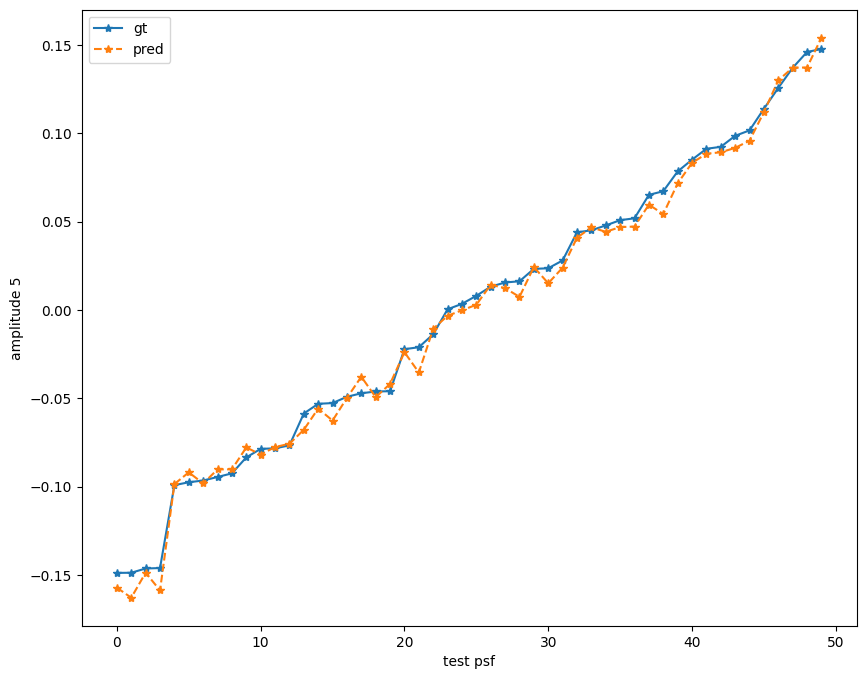

In [33]:
plt.figure(figsize=(10,8))
ind = np.argsort(amps.ravel())
plt.plot(amps[ind], marker='*', label='gt')
plt.plot(amps_pred[ind], '--', marker='*', label='pred')
# plt.hlines(-0.2, *plt.axis()[:2])
# plt.hlines(+0.2, *plt.axis()[:2])
plt.xlabel('test psf')
plt.ylabel(f'amplitude {tuple(model.config.zernike_amplitude_ranges.keys())[0]}')
plt.legend()
None;